# Calculating solar position in Python

This tutorial demonstrates how to calculate solar positions in Python using the [pvlib-python](https://pvlib-python.readthedocs.io/) library.


The first step is to import a few Python pacakges.

In [ ]:
# Install pvlib on Google Colab as this is not a standard package.
!pip install pvlib

In [2]:
import pvlib  # library for PV and solar calculations
import pandas as pd  # library for data analysis
import matplotlib.pyplot as plt  # library for plotting

## Step 1: Define a location

A location is defined by a latitude and longitude according to the convention of [ISO 6709](https://en.wikipedia.org/wiki/ISO_6709). Specifically, latitude is in degrees north of the equator and the longitude is in degrees east of the prime meridian.

In [3]:
location = pvlib.location.Location(
    latitude=55.79,
    longitude=12.52,
)

## Step 2: Define time stamps

The next step is to define the time stamps for which you want to calculate solar positions for. Here it is important to specify the timezone as otherwise UTC will be assumed.

For more information on available timezones, see the [pvlib documentation on timezones](https://pvlib-python.readthedocs.io/en/stable/user_guide/modeling_topics/timetimezones.html).

In [7]:
times = pd.date_range(
    start='2025-08-02 00:00',
    end='2025-08-02 23:59',
    freq='1min',  # frequency
    tz='Europe/Copenhagen',  # timezone
)

times

DatetimeIndex(['2025-08-02 00:00:00+02:00', '2025-08-02 00:01:00+02:00',
               '2025-08-02 00:02:00+02:00', '2025-08-02 00:03:00+02:00',
               '2025-08-02 00:04:00+02:00', '2025-08-02 00:05:00+02:00',
               '2025-08-02 00:06:00+02:00', '2025-08-02 00:07:00+02:00',
               '2025-08-02 00:08:00+02:00', '2025-08-02 00:09:00+02:00',
               ...
               '2025-08-02 23:50:00+02:00', '2025-08-02 23:51:00+02:00',
               '2025-08-02 23:52:00+02:00', '2025-08-02 23:53:00+02:00',
               '2025-08-02 23:54:00+02:00', '2025-08-02 23:55:00+02:00',
               '2025-08-02 23:56:00+02:00', '2025-08-02 23:57:00+02:00',
               '2025-08-02 23:58:00+02:00', '2025-08-02 23:59:00+02:00'],
              dtype='datetime64[ns, Europe/Copenhagen]', length=1440, freq='min')

## Step 3: Calculate solar position

Once we have defined a location and the time stamps for which we want to calculate solar position for, we can use the convenient ``.get_solarposition`` function of the location class to calculate the solar positions:

In [8]:
solpos = location.get_solarposition(times)

solpos.head()  # Inspect the first 5 rows

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2025-08-02 00:00:00+02:00,104.698894,104.698894,-14.698894,-14.698894,341.244504,-6.323866
2025-08-02 00:01:00+02:00,104.743983,104.743983,-14.743983,-14.743983,341.486216,-6.323817
2025-08-02 00:02:00+02:00,104.788509,104.788509,-14.788509,-14.788509,341.728089,-6.323768
2025-08-02 00:03:00+02:00,104.832472,104.832472,-14.832472,-14.832472,341.970122,-6.323719
2025-08-02 00:04:00+02:00,104.875871,104.875871,-14.875871,-14.875871,342.212313,-6.323670


## Step 4: Plot the solar position

array([<Axes: >, <Axes: >], dtype=object)

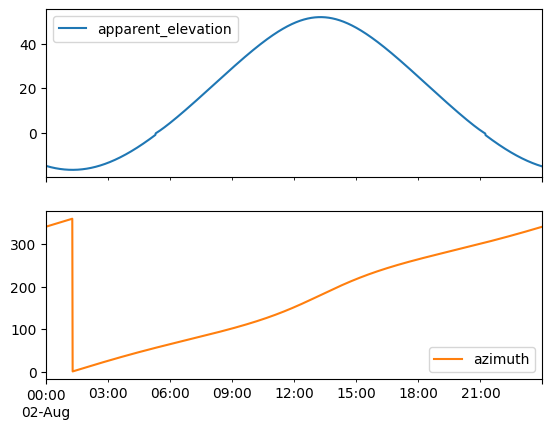

In [11]:
solpos[['apparent_elevation', 'azimuth']].plot(
    subplots=True, sharex=True)

## Step 5: Calculate atmospheric refraction

In this step you will need to calculate the atmospheric refraction for the day. Note, the information that you need is available in the ``solpos`` DataFrame.

In [12]:
# Write your code here to calculate refraction
